In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("walkdata.csv")

In [2]:
df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.810000e+11,4.810000e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.810000e+11,4.810000e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.810000e+11,4.810000e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.810000e+11,4.810000e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.810000e+11,4.810000e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


[[11299     1     0]
 [    0 21766    50]
 [    0    73 10959]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11300
           1       1.00      1.00      1.00     21816
           2       1.00      0.99      0.99     11032

    accuracy                           1.00     44148
   macro avg       1.00      1.00      1.00     44148
weighted avg       1.00      1.00      1.00     44148



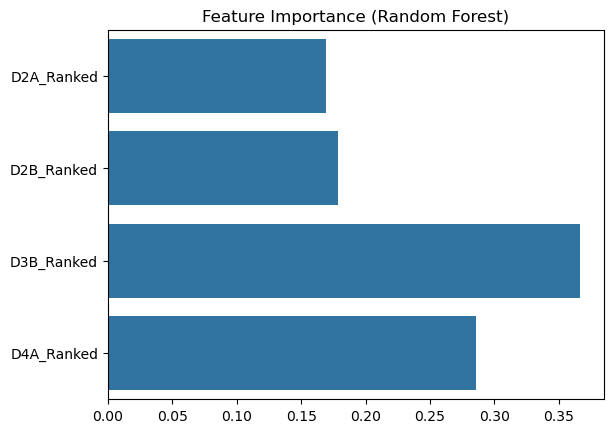

In [ ]:
df = pd.read_csv("walkdata.csv")

q1 = df['NatWalkInd'].quantile(0.25)
q3 = df['NatWalkInd'].quantile(0.75)

def classify_walkability(score):
    if score <= q1:
        return 0  # Low
    elif score <= q3:
        return 1  # Medium
    else:
        return 2  # High

df['Walkability_Label'] = df['NatWalkInd'].apply(classify_walkability)

features = ['D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked']
X = df[features]
y = df['Walkability_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = rf.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()